In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk(r'C:\Users\yatharth bansal\Desktop\Project\Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\yatharth bansal\Desktop\Project\Data\brain_tumor_dataset\no\1 no.jpeg
C:\Users\yatharth bansal\Desktop\Project\Data\brain_tumor_dataset\no\10 no.jpg
C:\Users\yatharth bansal\Desktop\Project\Data\brain_tumor_dataset\no\11 no.jpg
C:\Users\yatharth bansal\Desktop\Project\Data\brain_tumor_dataset\no\12 no.jpg
C:\Users\yatharth bansal\Desktop\Project\Data\brain_tumor_dataset\no\13 no.jpg
C:\Users\yatharth bansal\Desktop\Project\Data\brain_tumor_dataset\no\14 no.jpg
C:\Users\yatharth bansal\Desktop\Project\Data\brain_tumor_dataset\no\15 no.jpg
C:\Users\yatharth bansal\Desktop\Project\Data\brain_tumor_dataset\no\17 no.jpg
C:\Users\yatharth bansal\Desktop\Project\Data\brain_tumor_dataset\no\18 no.jpg
C:\Users\yatharth bansal\Desktop\Project\Data\brain_tumor_dataset\no\19 no.jpg
C:\Users\yatharth bansal\Desktop\Project\Data\brain_tumor_dataset\no\2 no.jpeg
C:\Users\yatharth bansal\Desktop\Project\Data\brain_tumor_dataset\no\20 no.jpg
C:\Users\yatharth bansal\Desktop\Project\Data\brain_

In [2]:
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Activation,Dropout
import seaborn as sb

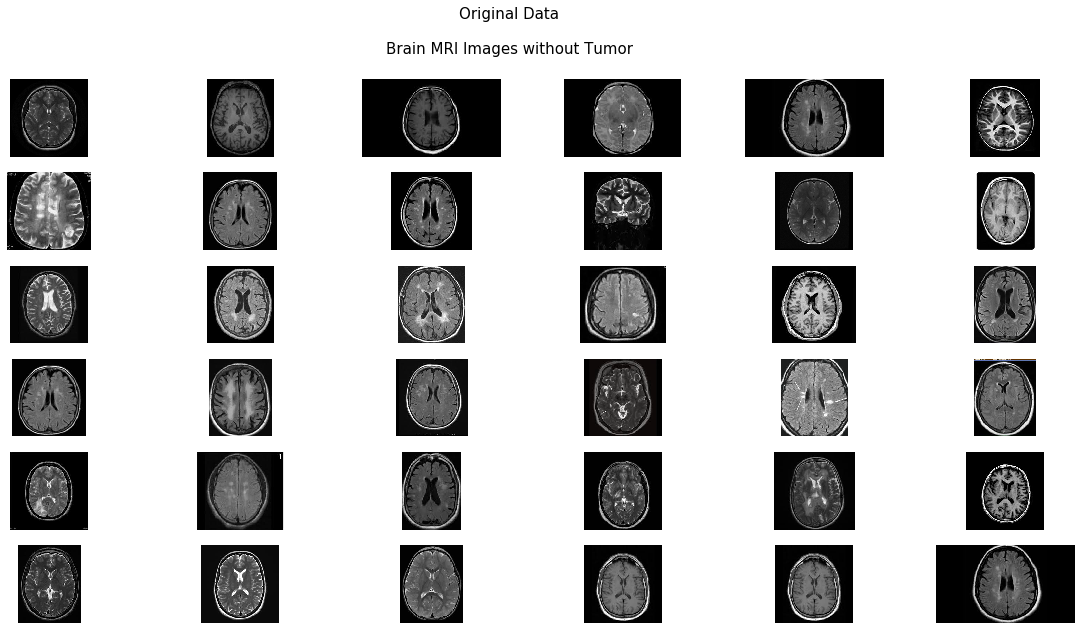

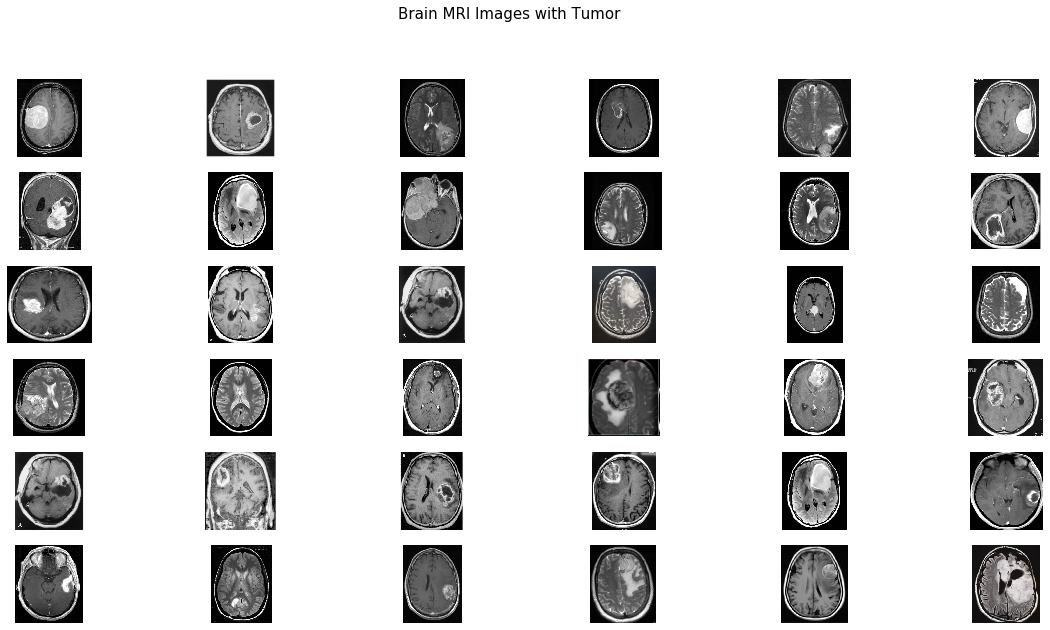

In [3]:
aug=[10,20]

#The two categories present in our dataset
categories=['no','yes']

#Display some of the images from the original dataset
for category in categories:
    win=plt.figure(figsize=(20,10))
    if category=='no':
        win.suptitle("Original Data\n\nBrain MRI Images without Tumor", fontsize=15)
    else:
        win.suptitle("Brain MRI Images with Tumor", fontsize=15) 
    index=1
    for img in os.listdir(os.path.join(r"C:\Users\yatharth bansal\Desktop\Project\Data\brain_tumor_dataset",category)):
        image=cv2.imread(os.path.join(r"C:\Users\yatharth bansal\Desktop\Project\Data\brain_tumor_dataset",category,img))
        try:
            win.add_subplot(6,6,index)
            plt.imshow(image)
            plt.axis('off')
            index=index+1
        except:
            break
    plt.show()

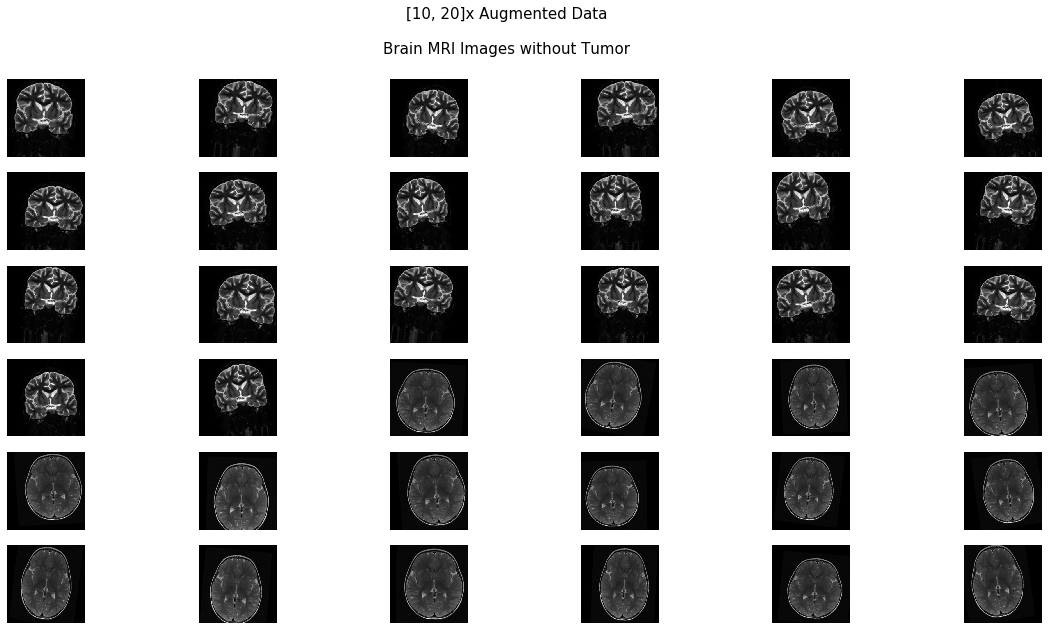

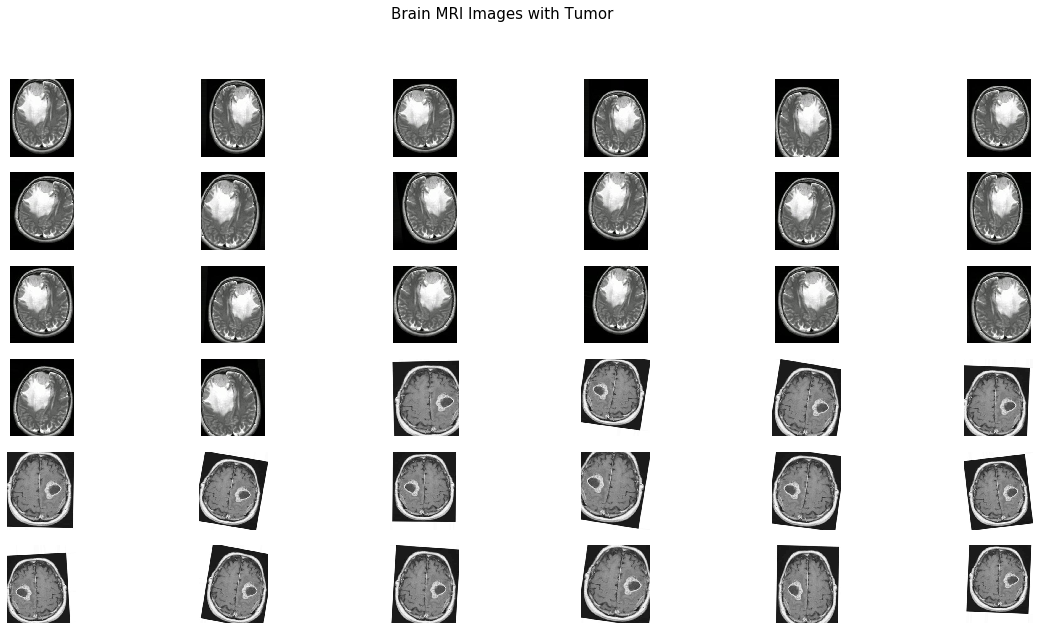

In [6]:
#Create an augmented image generator
datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.1,horizontal_flip=True,shear_range=0.15,rotation_range=10)

#Read the original data and generate augmented images from that original data and save the augmented data in augmented data directory
for category in categories:
    n=0
    for img in os.listdir(os.path.join(r"C:\Users\yatharth bansal\Desktop\Project\Data\brain_tumor_dataset",category)):
        n=n+1
        image=cv2.imread(os.path.join(r"C:\Users\yatharth bansal\Desktop\Project\Data\brain_tumor_dataset",category,img))
        image=np.expand_dims(image,0)
        i=0
        for img in datagen.flow(image,save_to_dir=os.path.join("Augmented_Data", category),save_format='jpg',save_prefix=n):
            i=i+1
            if i == 20:
                break

    #Display some of the images from the augmented dataset
    win=plt.figure(figsize=(20,10))
    if category=='no':
        win.suptitle(str(aug)+'x Augmented Data\n\nBrain MRI Images without Tumor', fontsize=15)
    else:
        win.suptitle("Brain MRI Images with Tumor", fontsize=15)
    index=1
    for img in os.listdir(os.path.join("Augmented_Data",category)):
        image=cv2.imread(os.path.join("Augmented_Data",category,img))
        try:
            win.add_subplot(6,6,index)
            plt.imshow(image)
            plt.axis('off')
            index=index+1
        except:
            break
    plt.show()


In [7]:
key = []
x = []
for category in categories:
    n=0
    for img in os.listdir(os.path.join("Augmented_Data",category)):
        image=cv2.imread(os.path.join("Augmented_Data",category,img))
        image = cv2.resize(image, (225, 225))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        if category == 'no':
            key.append(0)
            x.append(image)
        else:
            key.append(1)
            x.append(image)

In [8]:
key = np.array(key)
x = np.array(x)

In [9]:
x.shape

(5054, 225, 225)

In [10]:
x = x.reshape(x.shape[0], 225, 225, 1)
x.shape

(5054, 225, 225, 1)

In [11]:
x = x/255.

In [12]:
import numpy as np
from tensorflow.keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
import tensorflow as tf

batch_size = 1
num_classes = 1
epochs = 50

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, key, test_size=0.20, random_state=42)
y_test.shape

(1011,)

In [15]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [16]:
model = keras.models.Sequential([
    keras.layers.Conv2D(1, (3,3), activation='relu', input_shape=(225,225,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(1, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(1, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(640, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.0001),
             metrics=['acc'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 223, 223, 1)       10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 1)       10        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 1)         10        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 676)               0

In [18]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))

Train on 4043 samples, validate on 1011 samples
Epoch 1/50
4043/4043 [==============================] - 55s 14ms/sample - loss: 0.6660 - acc: 0.6188 - val_loss: 0.6805 - val_acc: 0.5865
Epoch 2/50
4043/4043 [==============================] - 55s 14ms/sample - loss: 0.6395 - acc: 0.6468 - val_loss: 0.6340 - val_acc: 0.6607
Epoch 3/50
4043/4043 [==============================] - 56s 14ms/sample - loss: 0.5986 - acc: 0.6928 - val_loss: 0.5962 - val_acc: 0.7082
Epoch 4/50
4043/4043 [==============================] - 56s 14ms/sample - loss: 0.5662 - acc: 0.7272 - val_loss: 0.5929 - val_acc: 0.7290
Epoch 5/50
4043/4043 [==============================] - 56s 14ms/sample - loss: 0.5594 - acc: 0.7410 - val_loss: 0.5872 - val_acc: 0.7379
Epoch 6/50
4043/4043 [==============================] - 56s 14ms/sample - loss: 0.5535 - acc: 0.7452 - val_loss: 0.5806 - val_acc: 0.7300
Epoch 7/50
4043/4043 [==============================] - 56s 14ms/sample - loss: 0.5465 - acc: 0.7507 - val_loss: 0.5973 - va

In [19]:
model.save('fft_model.h5')


In [20]:
import numpy as np
from tensorflow.keras import metrics
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
import tensorflow as tf
import cv2
import time

In [21]:
model = load_model('fft_model.h5')

In [22]:
weights = model.get_weights()

In [23]:
def zero_pad(img, pad):

    img_pad = np.pad(img, ((0,0), (pad, pad), (pad, pad), (0,0)), 'constant', constant_values = 0)
    return img_pad

In [24]:
def conv_single_step(a_slice_prev, W, b):

    s = np.sum(np.multiply(a_slice_prev, W)) + float(b)
    return s

In [25]:
def conv_forward(A_prev, W, b, hparameters):

    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape[0], A_prev.shape[1], A_prev.shape[2], A_prev.shape[3]
    
    
    (f, f, n_C_prev, n_C) = W.shape[0], W.shape[1], W.shape[2], W.shape[3]
    
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    n_H = int(((n_H_prev - f + (2 * pad)) / stride) + 1)
    n_W = int(((n_W_prev - f + (2 * pad)) / stride) + 1)
    
    Z = np.zeros((m, n_H, n_W, n_C))
    
    A_prev_pad = zero_pad(A_prev, pad)
    for i in range(m):                               
        a_prev_pad = A_prev_pad[i]  
        
        for h in range(n_H):                           
            for w in range(n_W):                       
                for c in range(n_C):                   
                    
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    a_slice_prev = a_prev_pad[vert_start:vert_end,horiz_start:horiz_end,:]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[:,:,:,c], b[:,:,:,c])
                                        
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [26]:
def pool_forward(A_prev, hparameters, mode = "max"):

    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(m):                         
        for h in range(n_H):                   
            for w in range(n_W):               
                for c in range (n_C):          
                    
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    a_prev_slice = A_prev[i,vert_start:vert_end,horiz_start:horiz_end,c]
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    cache = (A_prev, hparameters)
    
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [27]:
def relu(X):
   return np.maximum(0,X)
def sigmoid(X):
   return 1/(1+np.exp(-X))

In [28]:
def conv_model(img, weights, hparameters1, hparameters2):
    conv = relu(conv_forward(img, weights[0], weights[1].reshape(1,1,1,weights[1].shape[0]), hparameters1)[0])
    pool = pool_forward(conv, hparameters2)[0]
    conv1 = relu(conv_forward(pool, weights[2], weights[3].reshape(1,1,1,weights[1].shape[0]), hparameters1)[0])
    pool1 = pool_forward(conv1, hparameters2)[0]
    conv2 = relu(conv_forward(pool1, weights[4], weights[5].reshape(1,1,1,weights[1].shape[0]), hparameters1)[0])
    pool2 = pool_forward(conv2, hparameters2)[0]
    flatten = pool2.reshape(1,pool2.shape[1]*pool2.shape[2]*pool2.shape[3])
    neural_net = relu(np.dot(flatten, weights[6]) + weights[7])
    ans = sigmoid(np.dot(neural_net, weights[8]) + weights[9])
    
    tup = (ans, conv, pool, conv1, pool1, conv2, pool2)
    return tup

In [29]:
def fft_forward(img,w, b, hparameters1):
    
    l = img.shape[1]
    pa = (l - 3) // 2
    f2 = np.pad(w.reshape(3,3), (pa,pa))
    img = img.reshape(l,l)
    
    if l % 2 == 0:
        l = l-1
        img = img[:l,:l]
        f = np.fft.fft2(img)
        f21 = np.fft.fft2(f2)
        aaa = f * f21
        final = np.fft.ifft2(aaa)
        
        zeros = np.zeros((l,l))
        zeros[1:l // 2+1,1:l // 2+1] = final.real[l // 2+1:,l // 2+1:]
        zeros[1:l // 2+1,l // 2+1:] = final.real[l // 2+1:,1:l // 2+1]
        zeros[l // 2+1:,1:l // 2+1] = final.real[1:l // 2+1,l // 2+1:]
        zeros[l // 2+1:,l // 2+1:] = final.real[1:l // 2+1,1:l // 2+1]

        zeros = zeros[1:l,1:l] + b

    else:
        f = np.fft.fft2(img)
        f21 = np.fft.fft2(f2)
        aaa = f * f21
        final = np.fft.ifft2(aaa)
    
        zeros = np.zeros((l,l))
        zeros[1:l // 2+1,1:l // 2+1] = final.real[l // 2+1:,l // 2+1:]
        zeros[1:l // 2+1,l // 2+1:] = final.real[l // 2+1:,1:l // 2+1]
        zeros[l // 2+1:,1:l // 2+1] = final.real[1:l // 2+1,l // 2+1:]
        zeros[l // 2+1:,l // 2+1:] = final.real[1:l // 2+1,1:l // 2+1]

        zeros = zeros[1:l-1,1:l-1] + b
    return zeros

In [30]:
def fft_model(img, weights, hparameters1, hparameters2):
    fft = relu(fft_forward(img, weights[0], weights[1], hparameters1))
    pool = pool_forward(fft.reshape(1,223,223,1), hparameters2)[0]
    fft1 = relu(fft_forward(pool, weights[2], weights[3], hparameters1))
    pool1 = pool_forward(fft1.reshape(1,fft1.shape[1],fft1.shape[1],1), hparameters2)[0]
    fft2 = relu(fft_forward(pool1, weights[4], weights[5], hparameters1))
    pool2 = pool_forward(fft2.reshape(1,fft2.shape[1],fft2.shape[1],1), hparameters2)[0]
    flatten = pool2.reshape(1,pool2.shape[1]*pool2.shape[2]*pool2.shape[3])
    neural_net = relu(np.dot(flatten, weights[6]) + weights[7])
    ans = sigmoid(np.dot(neural_net, weights[8]) + weights[9])
    
    tup = (ans, fft, pool, fft1, pool1, fft2, pool2)
    return tup

In [31]:
hparameters1 = {
    'stride':1,
    'pad':0
}
hparameters2 = {
    'stride':2,
    'f':2
}
weights = model.get_weights()

In [32]:
conv_out = []

start = time.time()
for i in range(len(x_test)):
  img = cv2.resize(x_test[i],(225,225)).reshape(1,225,225,1)
  output = conv_model(img, weights, hparameters1, hparameters2)
  if output[0] >= 0.5:
    conv_out.append(1)
  else:
    conv_out.append(0)

end = time.time()
  
print('Time taken by CNN to predict class for 1011 images is', end - start)

Time taken by CNN to predict class for 253 images is 703.1379990577698


In [33]:
fft_out = []

start = time.time()
for i in range(len(x_test)):
  img = cv2.resize(x_test[i],(225,225)).reshape(1,225,225,1)
  output1 = fft_model(img, weights, hparameters1, hparameters2)
  if output1[0] >= 0.5:
    fft_out.append(1)
  else:
    fft_out.append(0)

end = time.time()
print('Time taken by FFT to predict class for 1011 images is', end - start)  

Time taken by FFT to predict class for 1011 images is 131.23796319961548


In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test, conv_out)

array([[273, 145],
       [ 88, 505]], dtype=int64)

In [36]:
confusion_matrix(y_test, fft_out)

array([[277, 141],
       [113, 480]], dtype=int64)

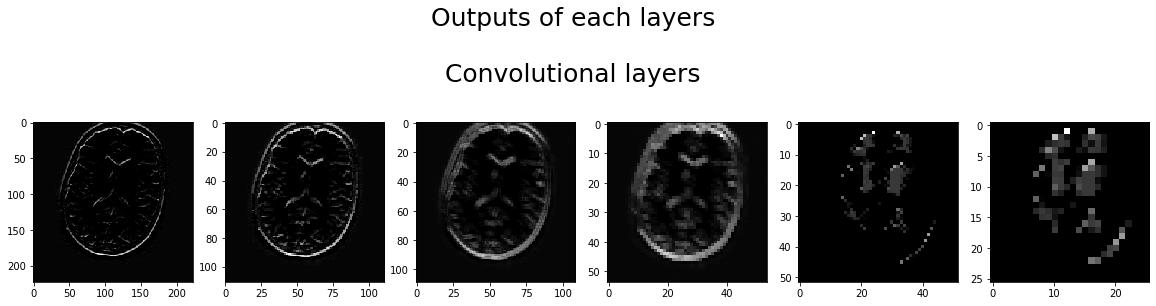

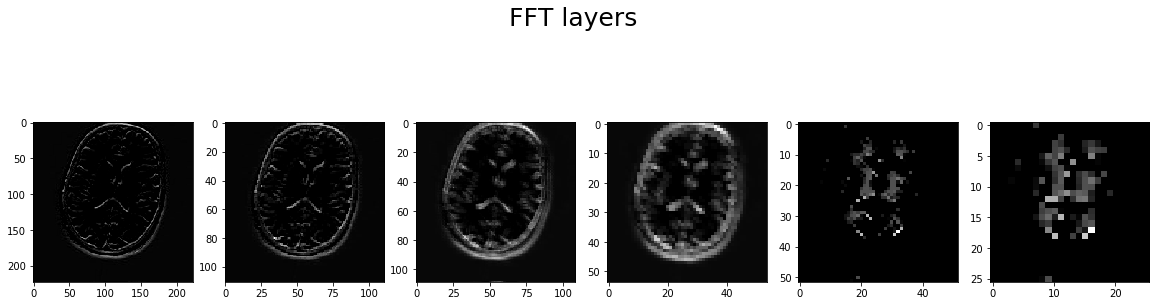

In [37]:
img = cv2.resize(x_test[15],(225,225)).reshape(1,225,225,1)  
output = conv_model(img, weights, hparameters1, hparameters2)
output1 = fft_model(img, weights, hparameters1, hparameters2)
categories = ['conv', 'fft']
for cat in categories:
  win=plt.figure(figsize=(20,10))
  if cat == 'conv':
    win.suptitle("Outputs of each layers\n\nConvolutional layers", fontsize=25)
  else:
    win.suptitle("FFT layers", fontsize=25) 
  index=1
  for i in range(1, len(output)):
      try:
          win.add_subplot(2,6,index) 
          if cat == 'fft':         
            plt.imshow(output1[i].reshape(output1[i].shape[1], output1[i].shape[1]), cmap='gray')
          else:
            plt.imshow(output[i].reshape(output[i].shape[1], output[i].shape[1]), cmap='gray')
          
          index=index+1
      except:
          break
  plt.show()